#Imports

In [20]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import colorsys
import seaborn as sns
from matplotlib.colors import to_rgb
from google.colab import drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/ИРМ/Spheroids/Raw_data.csv')

#Statistics

In [2]:
df

,Date,Cell_line,Agent,Image name,Label,"Area, mkm^2","Perimeter, mkm",Aspect_ratio,Extent,"Equivalent_diameter, mkm",...,Feret_max,Feret_min,Num_vertices,Logarithmic_hu_moment_1,Logarithmic_hu_moment_2,Logarithmic_hu_moment_3,Logarithmic_hu_moment_4,Logarithmic_hu_moment_5,Logarithmic_hu_moment_6,Logarithmic_hu_moment_7
0,2025-07-02,ARPE-19,Y27632,20250702_ARPE_Y27632_0h,Small spheroid,6296.84,301.518413,1.075000,0.756395,89.539855,...,96.724971,7.071068,2,2.821731,7.925910,10.818486,11.123778,-22.186333,15.270500,-22.326872
1,2025-07-02,ARPE-19,Y27632,20250702_ARPE_Y27632_0h,Small spheroid,2221.56,173.071905,0.961538,0.706154,53.184378,...,58.248090,1.414214,1,2.887918,8.475974,11.143603,12.429825,24.868832,-16.908040,-24.227585
2,2025-07-02,ARPE-19,Y27632,20250702_ARPE_Y27632_0h,Small spheroid,3025.00,202.804286,1.037037,0.826720,62.060854,...,68.870894,5.500000,2,2.866492,7.566354,10.805177,12.027247,-24.888172,-16.245329,-23.443739
3,2025-07-02,ARPE-19,Y27632,20250702_ARPE_Y27632_0h,Small spheroid,1936.00,160.626825,0.880000,0.727273,49.648683,...,56.089215,1.414214,2,2.810546,7.284737,11.271086,12.294836,24.566610,-16.003025,-24.101955
4,2025-07-02,ARPE-19,Y27632,20250702_ARPE_Y27632_0h,Small spheroid,5566.00,289.607143,0.883721,0.703794,84.183438,...,100.528205,7.778175,4,2.827829,6.476811,11.146459,12.038030,23.961592,16.648848,23.683517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2025-07-14,ARPE-19,Control,20250714_ARPE_control_3_4x,Spheroid_core,27331.48,640.059365,1.500000,0.768299,186.546298,...,239.072290,8.485281,2,2.717523,6.202586,9.791497,10.125884,20.085667,13.231611,21.234222
716,2025-07-14,ARPE-19,Control,20250714_ARPE_control_3_4x,Spheroid_core,22791.56,577.170635,1.090909,0.728046,170.349979,...,194.497918,14.849242,4,2.765642,6.648854,10.260099,12.003525,-23.135868,-15.374693,-24.441551
717,2025-07-14,ARPE-19,Control,20250714_ARPE_control_3_4x,Spheroid_core,35172.28,731.574920,1.344828,0.713921,211.619323,...,272.489339,11.313708,3,2.650291,6.070678,9.514574,10.987361,21.338917,14.022720,21.453790
718,2025-07-14,ARPE-19,Control,20250714_ARPE_control_3_4x,Spheroid_core,32640.96,681.352380,1.258824,0.741506,203.862113,...,237.406403,15.556349,3,2.648907,6.513135,10.891186,10.862035,22.361584,-14.709290,-21.751337


In [3]:
dates = ['2025-07-02', '2025-07-03', '2025-07-04', '2025-07-11', '2025-07-11', '2025-07-14']
lines = ['ARPE-19', 'HDF']
agents = ['Control', 'Blebbistatin', 'Cytochalasin', 'Y27632']
classes = ['Spheroid', 'Small spheroid', 'Spheroid_core']
numeric_features = ['Area, mkm^2', 'Perimeter, mkm', 'Aspect_ratio', 'Eccentricity',
                    'Circularity', 'Convexity', 'Roundness', 'Compactness']

grouped_stats = df.groupby(['Date', 'Cell_line', 'Agent', 'Label'])[numeric_features].agg(['mean', 'std', 'count']).round(3)
grouped_stats


Area, mkm^2              \
                                                        mean         std   
Date       Cell_line Agent        Label                                    
2025-07-02 ARPE-19   Blebbistatin Small spheroid    6117.760     804.037   
                                  Spheroid         32521.412    5676.596   
                     Control      Small spheroid    6802.620      71.870   
                                  Spheroid         28337.716    3694.235   
                     Cytochalasin Small spheroid    5991.920         NaN   
                                  Spheroid         37644.915    4477.413   
                     Y27632       Small spheroid    4066.040    1557.151   
                                  Spheroid         39009.946    7314.207   
2025-07-03 ARPE-19   Blebbistatin Small spheroid    8174.760         NaN   
                                  Spheroid         25090.275    5542.695   
                     Control      Small spheroid    8586.160         NaN   
                                  Spheroid         22335.758    3723.143   
                     Cytochalasin Small spheroid    8704.740    3412.130   
                                  Spheroid         29565.223    5050.823   
                     Y27632       Spheroid         30728.579    6076.563   
           HDF       Control      Spheroid        644219.058  416892.858   
                                  Spheroid_core    80295.062   33227.600   
2025-07-04 ARPE-19   Blebbistatin Spheroid         41300.757    7494.276   
                                  Spheroid_core    25529.680    4471.724   
                     Control      Spheroid         26298.425    4128.398   
                                  Spheroid_core    21175.509    3383.530   
                     Cytochalasin Spheroid         31027.447    5210.235   
                                  Spheroid_core    27087.329    4242.669   
                     Y27632       Spheroid         38552.052    6803.291   
                                  Spheroid_core    31723.780    4224.364   
2025-07-11 ARPE-19   Blebbistatin Spheroid        315015.030   61220.488   
                                  Spheroid_core    40667.562    7227.303   
                     Control      Spheroid        226981.040   47902.303   
                                  Spheroid_core    38178.800   13707.892   
                     Cytochalasin Spheroid        268801.500  110046.720   
                                  Spheroid_core    26019.598    6043.565   
                     Y27632       Spheroid        720998.046  282537.187   
                                  Spheroid_core    45203.738   14266.259   
2025-07-14 ARPE-19   Blebbistatin Spheroid        453252.244  174712.270   
                                  Spheroid_core    34303.816    8334.297   
                     Control      Spheroid        364343.100  127547.292   
                                  Spheroid_core    37225.731   11146.515   
                     Cytochalasin Spheroid        390169.609  175742.321   
                                  Spheroid_core    23477.457    6407.686   
                     Y27632       Spheroid        654883.729  400571.506   
                                  Spheroid_core    44840.871    9345.945   

                                                       Perimeter, mkm  \
                                                 count           mean   
Date       Cell_line Agent        Label                                 
2025-07-02 ARPE-19   Blebbistatin Small spheroid     3        293.252   
                                  Spheroid          30        687.705   
                     Control      Small spheroid     2        315.363   
                                  Spheroid          30        634.165   
                     Cytochalasin Small spheroid     1        292.940   
                                  Spheroid          32        759.605   
                     Y27632       Small spheroi

#Graphical visualisation for class='Spheroid'

##Boxplots

###ARPE-19 Spheroid Area Over Time by Treatment

####Boxplot

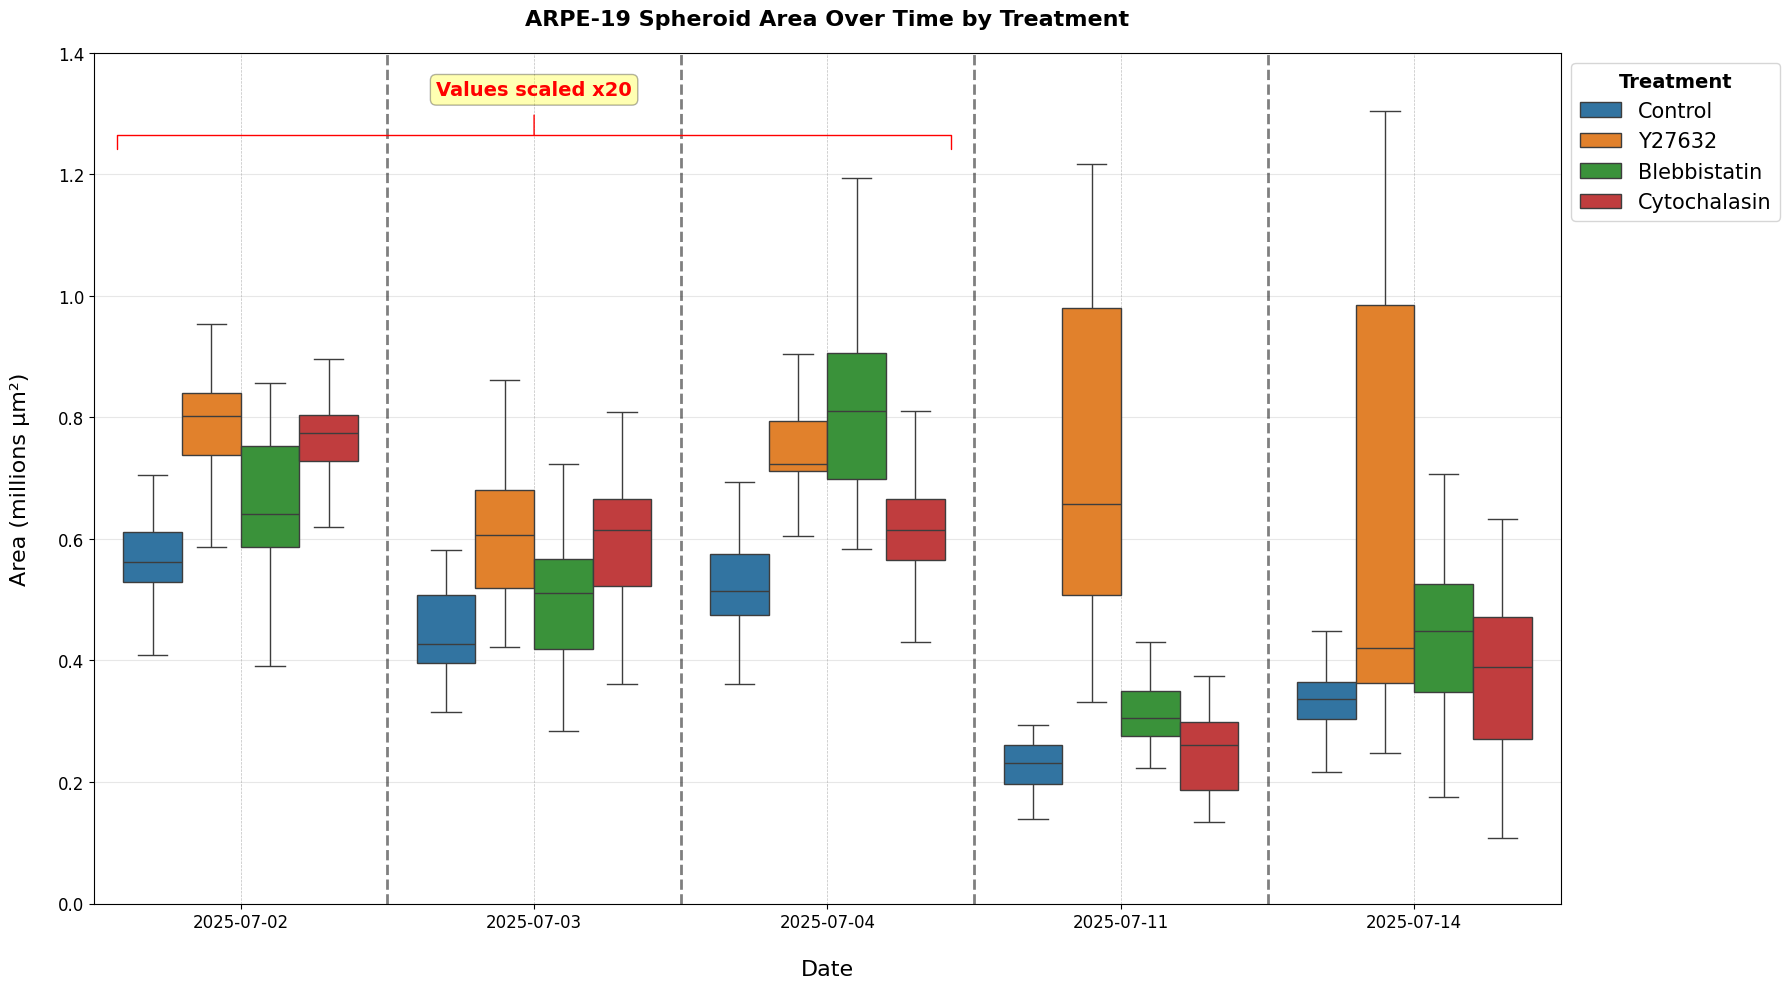

In [4]:
plt.figure(figsize=(18, 10))

df_filtered = df[
    (df['Cell_line'] == 'ARPE-19') &
    (df['Label'].isin(['Spheroid']))
]

df_filtered_copy = df_filtered.copy()
df_filtered_copy.loc[df_filtered_copy['Date'] < '2025-07-10', 'Area, mkm^2'] = df_filtered_copy.loc[df['Date'] < '2025-07-10',
                                                                                                    'Area, mkm^2'] * 20
dates = sorted(df_filtered_copy['Date'].unique())
agents = ['Control', 'Y27632', 'Blebbistatin', 'Cytochalasin']
custom_palette = {'Control': '#1f77b4',
                  'Y27632': '#ff7f0e',
                  'Blebbistatin': '#2ca02c',
                  'Cytochalasin': '#d62728'}

sns.boxplot(data=df_filtered_copy, x='Date', y='Area, mkm^2', hue='Agent',
            hue_order=agents, palette=custom_palette, showfliers=False)

plt.ylim(0, 1400000)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}'))
plt.title('ARPE-19 Spheroid Area Over Time by Treatment', fontsize=16, fontweight='bold', pad=20)

plt.xlabel('Date', fontsize=16, labelpad=20)
plt.xticks(rotation=0, fontsize=12)

plt.ylabel('Area (millions μm²)', fontsize=16, labelpad=20)
plt.yticks(fontsize=12)

plt.legend(title='Treatment', bbox_to_anchor=(1, 1), prop={'size': 15}, title_fontsize=14).get_title().set_fontweight('bold')

plt.grid(True, axis='y', alpha=0.3)
plt.grid(True, axis='x', alpha=0.5, linestyle='--', color='gray', linewidth=0.5)

plt.annotate('', xy=(0.3, 0.9), xytext=(0.3, 0.93),
             xycoords='axes fraction', textcoords='axes fraction',
             arrowprops=dict(arrowstyle='-[, widthB=30, lengthB=1', lw=1, color='red'))
plt.annotate('Values scaled x20', xy=(0.3, 0.95), xycoords='axes fraction', ha='center',
             fontsize=14, color='red', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.3))

for i in range(1, len(dates)):
    plt.axvline(x=i-0.5, color='black', linestyle='--', linewidth=2, alpha=0.5)

plt.tight_layout()
plt.show()

####Boxplot + stripplot

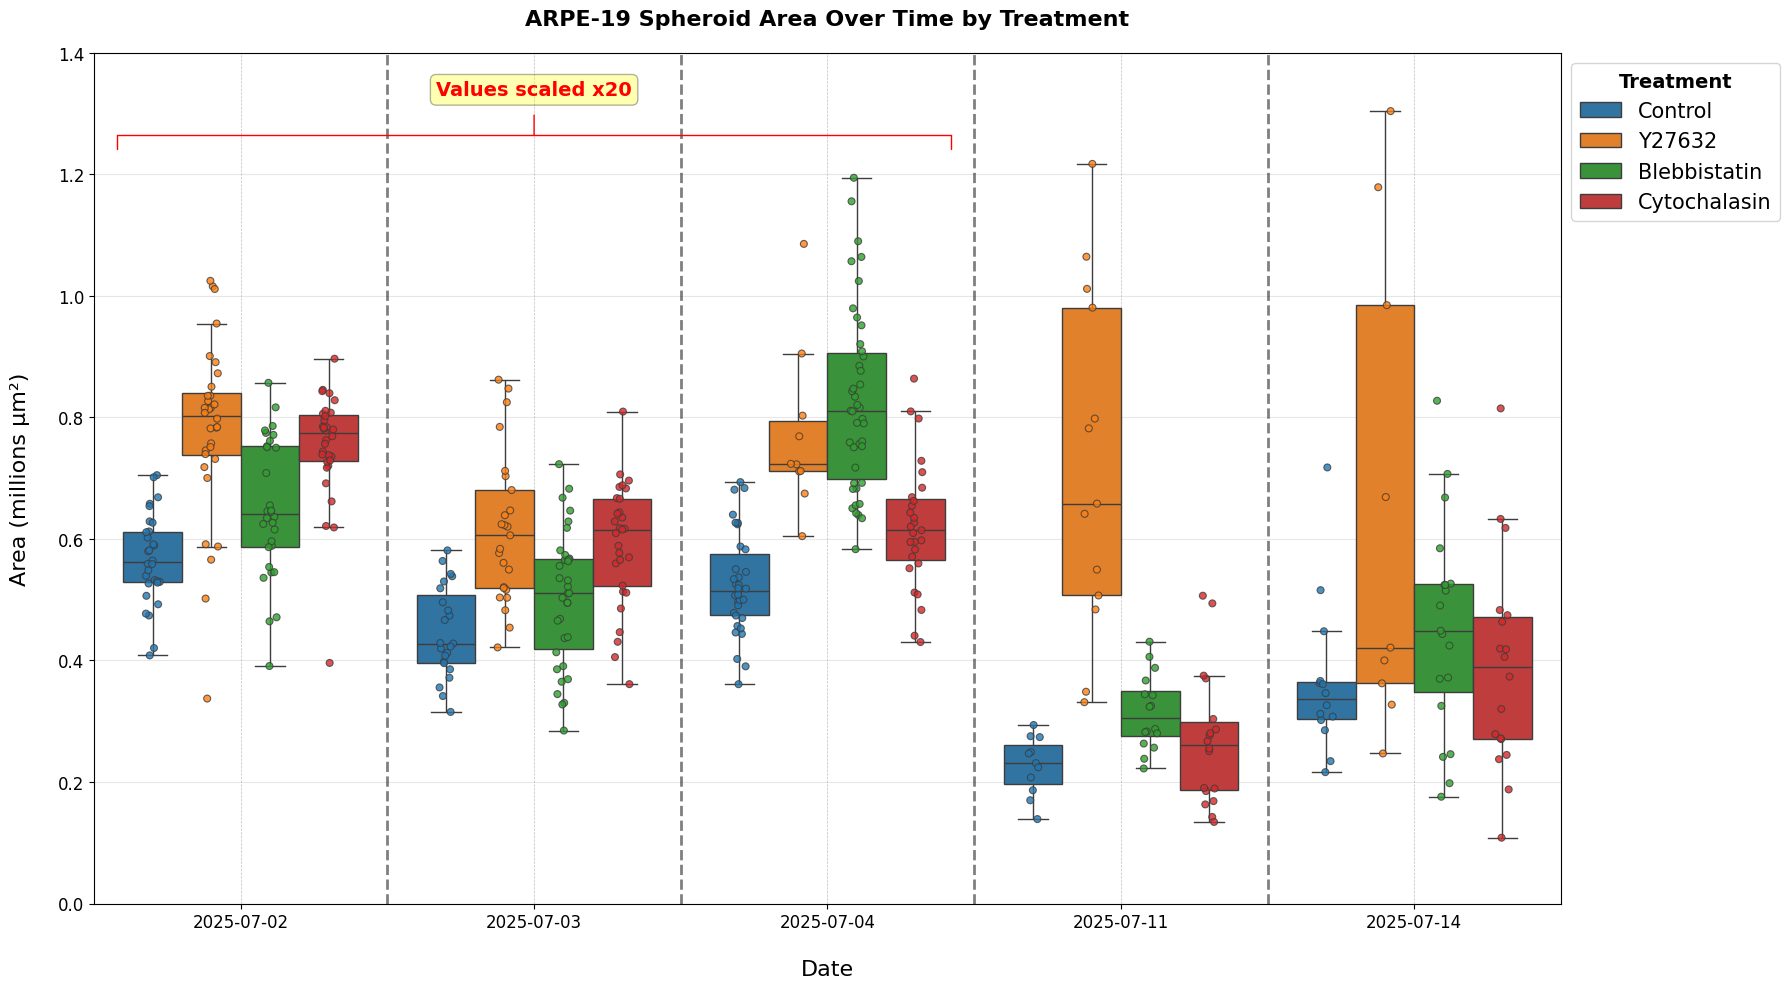

In [5]:
plt.figure(figsize=(18, 10))

df_filtered_copy = df_filtered.copy()
df_filtered_copy.loc[df_filtered_copy['Date'] < '2025-07-10', 'Area, mkm^2'] = df_filtered_copy.loc[df['Date'] < '2025-07-10',
                                                                                                    'Area, mkm^2'] * 20
dates = sorted(df_filtered_copy['Date'].unique())
agents = ['Control', 'Y27632', 'Blebbistatin', 'Cytochalasin']
custom_palette = {'Control': '#1f77b4',
                  'Y27632': '#ff7f0e',
                  'Blebbistatin': '#2ca02c',
                  'Cytochalasin': '#d62728'}

sns.boxplot(data=df_filtered_copy, x='Date', y='Area, mkm^2', hue='Agent',
            hue_order=agents, palette=custom_palette, showfliers=False)
sns.stripplot(data=df_filtered_copy, x='Date', y='Area, mkm^2', hue='Agent',
              palette=custom_palette, hue_order=agents,
              dodge=True,
              size=5,
              alpha=0.8,
              linewidth=0.8,
              legend=False)

plt.ylim(0, 1400000)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}'))
plt.title('ARPE-19 Spheroid Area Over Time by Treatment', fontsize=16, fontweight='bold', pad=20)

plt.xlabel('Date', fontsize=16, labelpad=20)
plt.xticks(rotation=0, fontsize=12)

plt.ylabel('Area (millions μm²)', fontsize=16, labelpad=20)
plt.yticks(fontsize=12)

plt.legend(title='Treatment', bbox_to_anchor=(1, 1), prop={'size': 15}, title_fontsize=14).get_title().set_fontweight('bold')

plt.grid(True, axis='y', alpha=0.3)
plt.grid(True, axis='x', alpha=0.5, linestyle='--', color='gray', linewidth=0.5)

plt.annotate('', xy=(0.3, 0.9), xytext=(0.3, 0.93),
             xycoords='axes fraction', textcoords='axes fraction',
             arrowprops=dict(arrowstyle='-[, widthB=30, lengthB=1', lw=1, color='red'))
plt.annotate('Values scaled x20', xy=(0.3, 0.95), xycoords='axes fraction', ha='center',
             fontsize=14, color='red', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.3))

for i in range(1, len(dates)):
    plt.axvline(x=i-0.5, color='black', linestyle='--', linewidth=2, alpha=0.5)

plt.tight_layout()
plt.show()

####Day instead of date

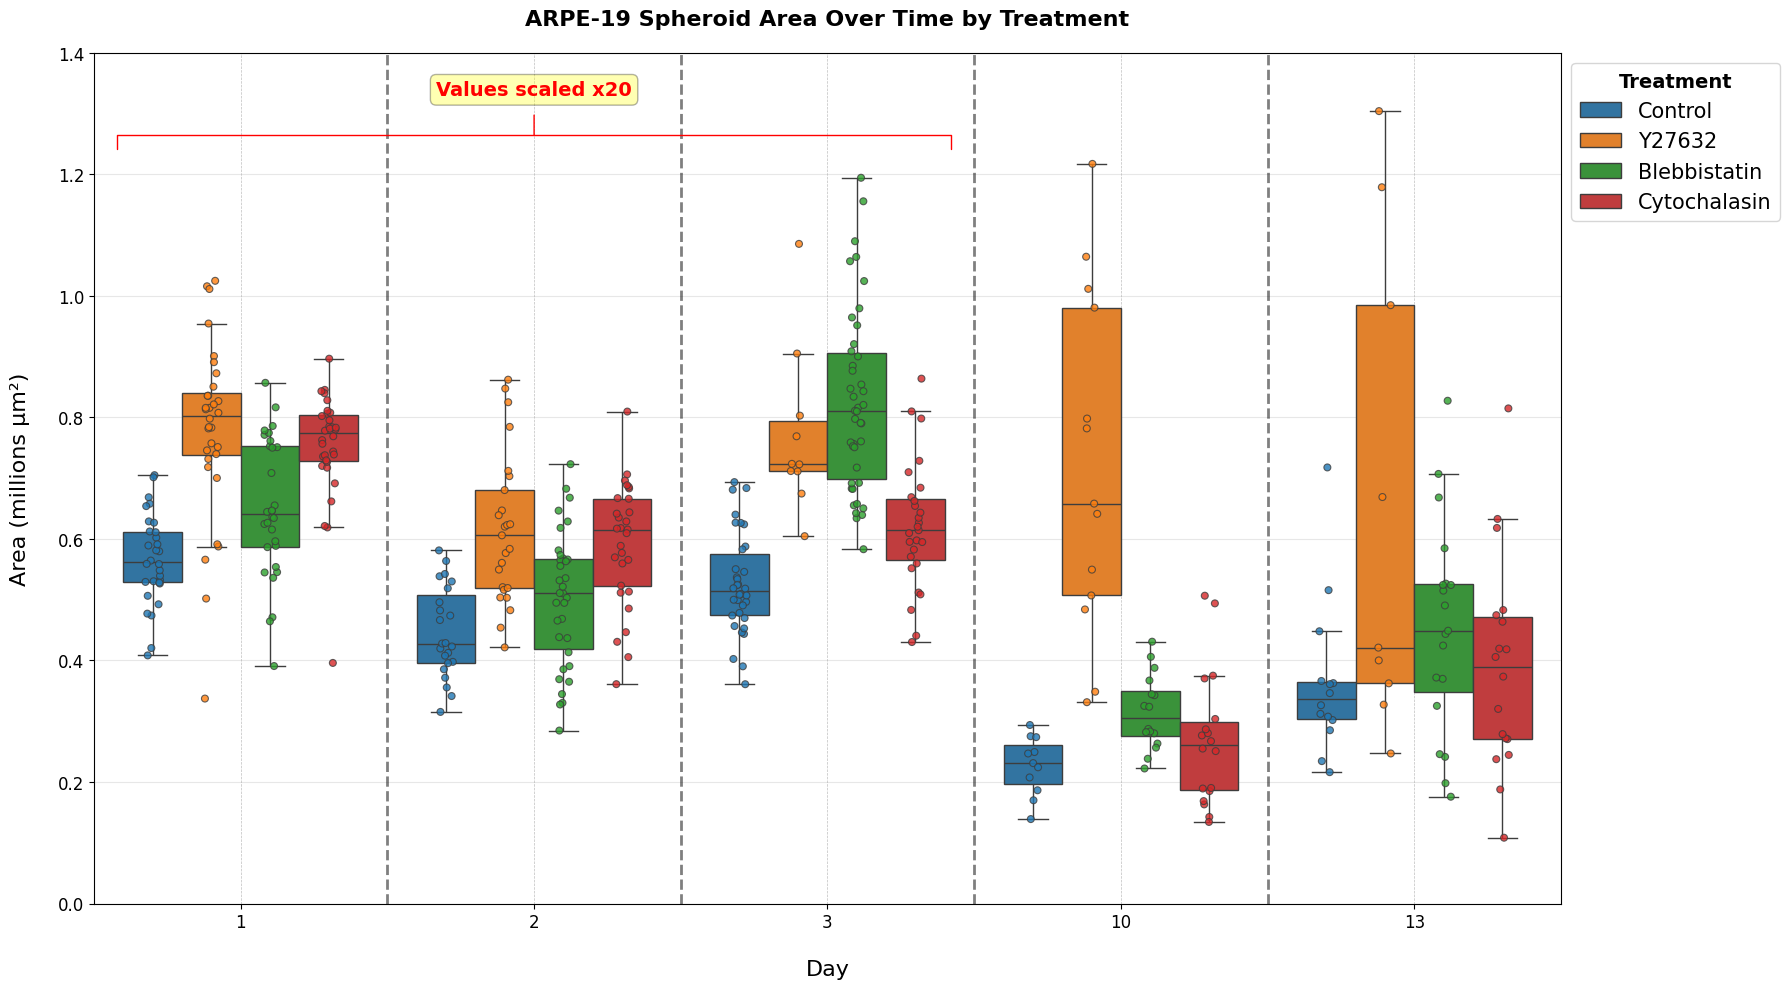

In [6]:
plt.figure(figsize=(18, 10))

df_filtered_copy = df_filtered.copy()
df_filtered_copy['Day'] = (pd.to_datetime(df_filtered_copy['Date']) - pd.to_datetime(df_filtered_copy['Date']).min()).dt.days + 1
df_filtered_copy.loc[df_filtered_copy['Date'] < '2025-07-10', 'Area, mkm^2'] = df_filtered_copy.loc[df['Date'] < '2025-07-10',
                                                                                                    'Area, mkm^2'] * 20
dates = sorted(df_filtered_copy['Date'].unique())
agents = ['Control', 'Y27632', 'Blebbistatin', 'Cytochalasin']
custom_palette = {'Control': '#1f77b4',
                  'Y27632': '#ff7f0e',
                  'Blebbistatin': '#2ca02c',
                  'Cytochalasin': '#d62728'}

sns.boxplot(data=df_filtered_copy, x='Day', y='Area, mkm^2', hue='Agent',
            hue_order=agents, palette=custom_palette, showfliers=False)
sns.stripplot(data=df_filtered_copy, x='Day', y='Area, mkm^2', hue='Agent',
              palette=custom_palette, hue_order=agents,
              dodge=True,
              size=5,
              alpha=0.8,
              linewidth=0.8,
              legend=False)

plt.ylim(0, 1400000)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}'))
plt.title('ARPE-19 Spheroid Area Over Time by Treatment', fontsize=16, fontweight='bold', pad=20)

plt.xlabel('Day', fontsize=16, labelpad=20)
plt.xticks(rotation=0, fontsize=12)

plt.ylabel('Area (millions μm²)', fontsize=16, labelpad=20)
plt.yticks(fontsize=12)

plt.legend(title='Treatment', bbox_to_anchor=(1, 1), prop={'size': 15}, title_fontsize=14).get_title().set_fontweight('bold')

plt.grid(True, axis='y', alpha=0.3)
plt.grid(True, axis='x', alpha=0.5, linestyle='--', color='gray', linewidth=0.5)

plt.annotate('', xy=(0.3, 0.9), xytext=(0.3, 0.93),
             xycoords='axes fraction', textcoords='axes fraction',
             arrowprops=dict(arrowstyle='-[, widthB=30, lengthB=1', lw=1, color='red'))
plt.annotate('Values scaled x20', xy=(0.3, 0.95), xycoords='axes fraction', ha='center',
             fontsize=14, color='red', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.3))

days = sorted(df_filtered_copy['Day'].unique())
for i in range(1, len(days)):
    plt.axvline(x=i-0.5, color='black', linestyle='--', linewidth=2, alpha=0.5)

plt.tight_layout()
plt.show()

####Square scale annotation instead of bracket scale annotation

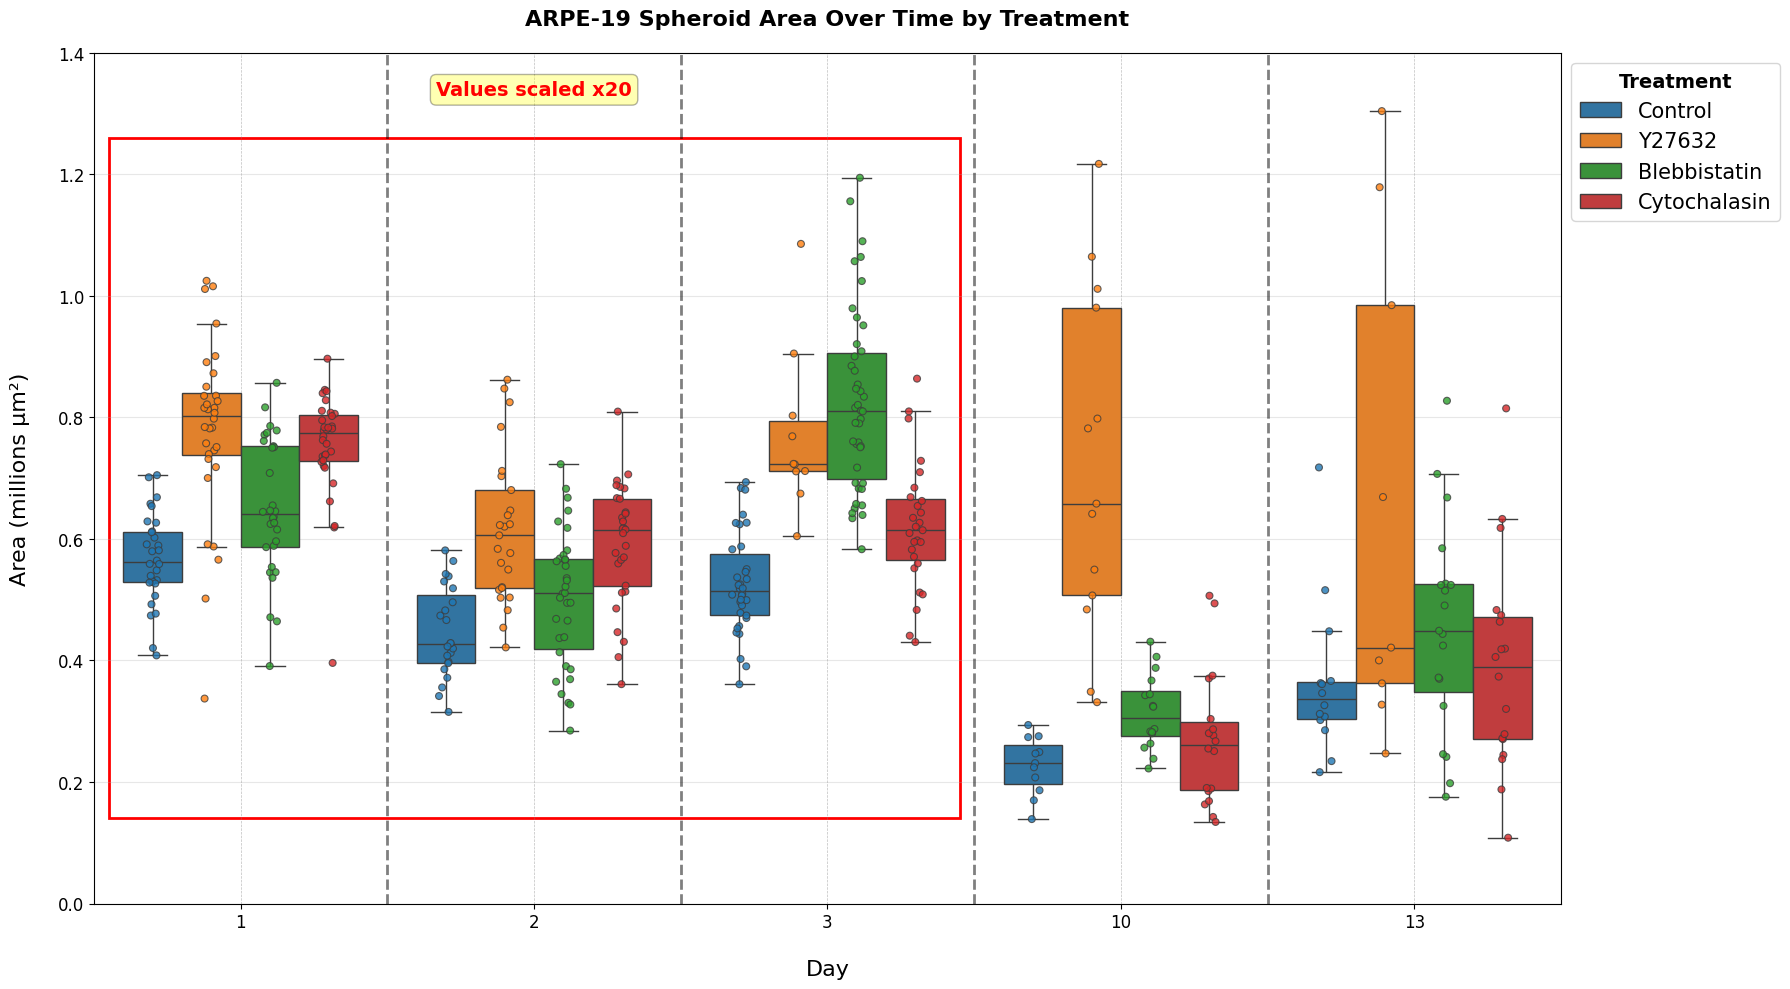

In [7]:
from matplotlib.patches import Rectangle

plt.figure(figsize=(18, 10))

df_filtered_copy = df_filtered.copy()
df_filtered_copy['Day'] = (pd.to_datetime(df_filtered_copy['Date']) - pd.to_datetime(df_filtered_copy['Date']).min()).dt.days + 1
df_filtered_copy.loc[df_filtered_copy['Date'] < '2025-07-10', 'Area, mkm^2'] = df_filtered_copy.loc[df['Date'] < '2025-07-10',
                                                                                                    'Area, mkm^2'] * 20
dates = sorted(df_filtered_copy['Date'].unique())
agents = ['Control', 'Y27632', 'Blebbistatin', 'Cytochalasin']
custom_palette = {'Control': '#1f77b4',
                  'Y27632': '#ff7f0e',
                  'Blebbistatin': '#2ca02c',
                  'Cytochalasin': '#d62728'}

sns.boxplot(data=df_filtered_copy, x='Day', y='Area, mkm^2', hue='Agent',
            hue_order=agents, palette=custom_palette, showfliers=False)
sns.stripplot(data=df_filtered_copy, x='Day', y='Area, mkm^2', hue='Agent',
              palette=custom_palette, hue_order=agents,
              dodge=True,
              size=5,
              alpha=0.8,
              linewidth=0.8,
              legend=False)

plt.ylim(0, 1400000)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}'))
plt.title('ARPE-19 Spheroid Area Over Time by Treatment', fontsize=16, fontweight='bold', pad=20)

plt.xlabel('Day', fontsize=16, labelpad=20)
plt.xticks(rotation=0, fontsize=12)

plt.ylabel('Area (millions μm²)', fontsize=16, labelpad=20)
plt.yticks(fontsize=12)

plt.legend(title='Treatment', bbox_to_anchor=(1, 1), prop={'size': 15}, title_fontsize=14).get_title().set_fontweight('bold')

plt.grid(True, axis='y', alpha=0.3)
plt.grid(True, axis='x', alpha=0.5, linestyle='--', color='gray', linewidth=0.5)

plt.gca().add_patch(Rectangle((0.01, 0.1), 0.58, 0.8,
                              linewidth=2, edgecolor='red', facecolor='none',
                              transform=plt.gca().transAxes))
plt.annotate('Values scaled x20', xy=(0.3, 0.95), xycoords='axes fraction', ha='center',
             fontsize=14, color='red', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.3))

days = sorted(df_filtered_copy['Day'].unique())
for i in range(1, len(days)):
    plt.axvline(x=i-0.5, color='black', linestyle='--', linewidth=2, alpha=0.5)

plt.tight_layout()
plt.show()


####Splitted into two figures box+stripplot

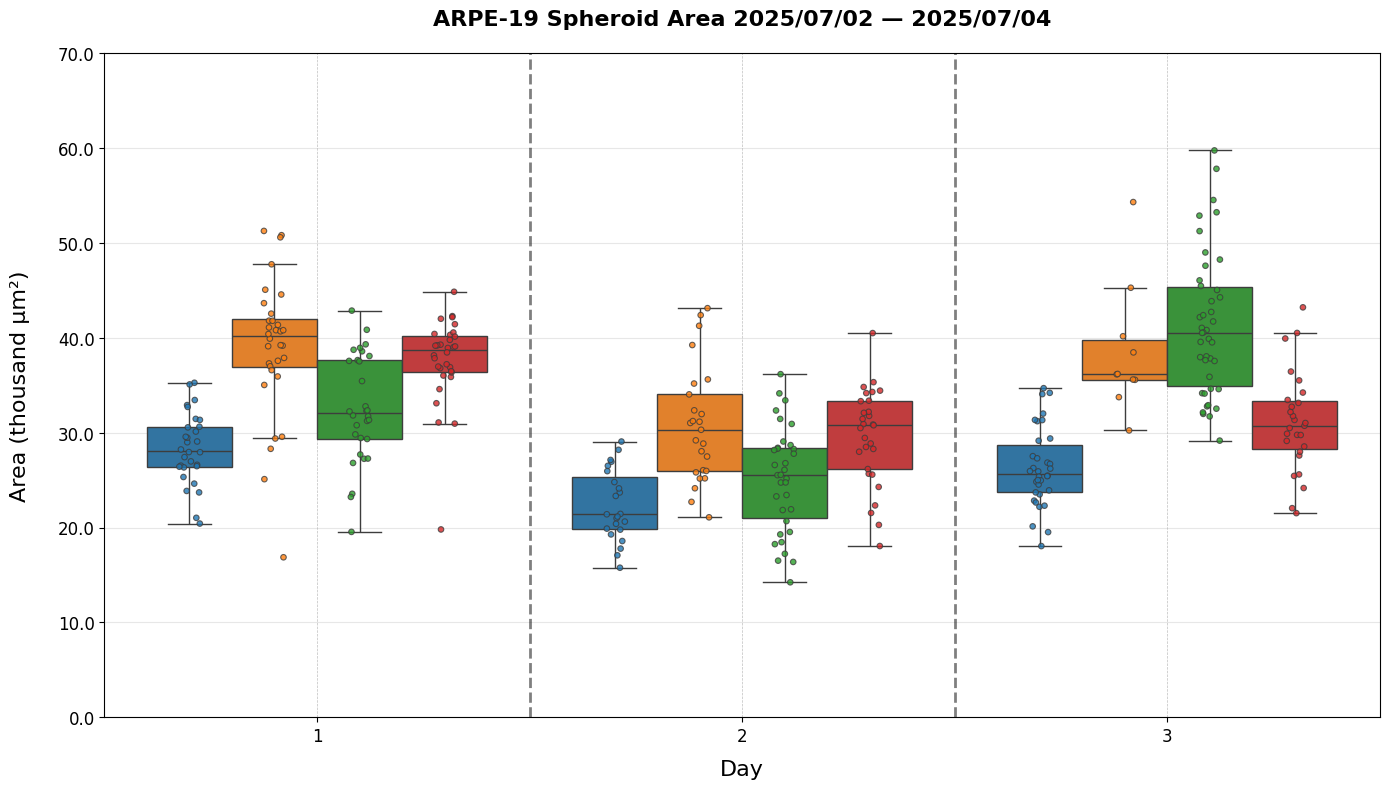

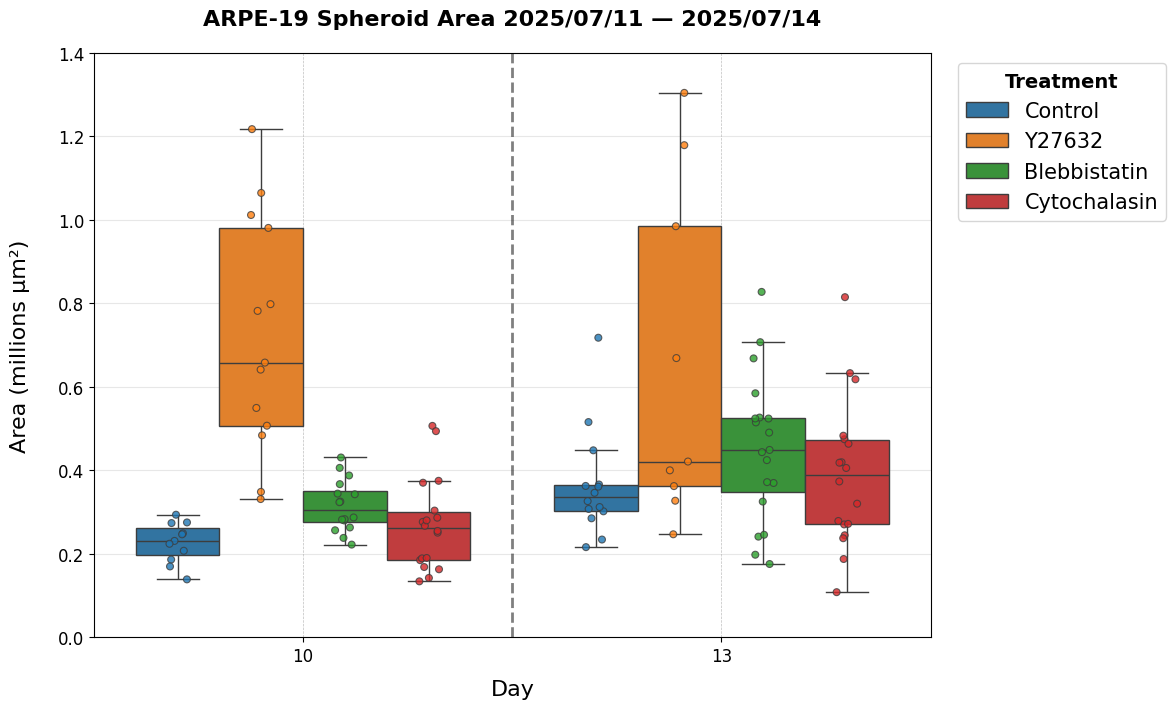

In [8]:
df_filtered_copy = df_filtered.copy()
df_filtered_copy['Day'] = (pd.to_datetime(df_filtered_copy['Date']) - pd.to_datetime(df_filtered_copy['Date']).min()).dt.days + 1

# Split data into before and after
before_date = '2025-07-10'
df_before = df_filtered_copy[df_filtered_copy['Date'] < before_date].copy()
df_after = df_filtered_copy[df_filtered_copy['Date'] >= before_date].copy()

df_before_date = df_before.copy()

agents = ['Control', 'Y27632', 'Blebbistatin', 'Cytochalasin']
custom_palette = {'Control': '#1f77b4',
                  'Y27632': '#ff7f0e',
                  'Blebbistatin': '#2ca02c',
                  'Cytochalasin': '#d62728'}

# FIGURE 1: Before date (original scale)
plt.figure(figsize=(14, 8))

sns.boxplot(data=df_before_date, x='Day', y='Area, mkm^2', hue='Agent',
            hue_order=agents, palette=custom_palette, showfliers=False, legend=False)
sns.stripplot(data=df_before_date, x='Day', y='Area, mkm^2', hue='Agent',
              palette=custom_palette, hue_order=agents,
              dodge=True, size=4, alpha=0.8, linewidth=0.8, legend=False)

plt.ylim(0, 70000)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e3:.1f}'))
plt.title(f'ARPE-19 Spheroid Area 2025/07/02 — 2025/07/04', fontsize=16, fontweight='bold', pad=20)

plt.xlabel('Day', fontsize=16, labelpad=10)
plt.xticks(rotation=0, fontsize=12)

plt.ylabel('Area (thousand μm²)', fontsize=16, labelpad=20)
plt.yticks(fontsize=12)

plt.grid(True, axis='y', alpha=0.3)
plt.grid(True, axis='x', alpha=0.5, linestyle='--', color='gray', linewidth=0.5)

days_before = sorted(df_before_date['Day'].unique())
for i in range(1, len(days_before)):
    plt.axvline(x=i-0.5, color='black', linestyle='--', linewidth=2, alpha=0.5)

plt.tight_layout()
plt.show()

# FIGURE 2: After date (original scale)
plt.figure(figsize=(14, 8))

sns.boxplot(data=df_after, x='Day', y='Area, mkm^2', hue='Agent',
            hue_order=agents, palette=custom_palette, showfliers=False)
sns.stripplot(data=df_after, x='Day', y='Area, mkm^2', hue='Agent',
              palette=custom_palette, hue_order=agents,
              dodge=True, size=5, alpha=0.8, linewidth=0.8, legend=False)

plt.ylim(0, 1400000)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}'))
plt.title(f'ARPE-19 Spheroid Area 2025/07/11 — 2025/07/14', fontsize=16, fontweight='bold', pad=20)

plt.xlabel('Day', fontsize=16, labelpad=10)
plt.xticks(rotation=0, fontsize=12)

plt.ylabel('Area (millions μm²)', fontsize=16, labelpad=20)
plt.yticks(fontsize=12)
plt.legend(title='Treatment', bbox_to_anchor=(1.02, 1), loc='upper left', prop={'size': 15}, title_fontsize=14).get_title().set_fontweight('bold')

plt.grid(True, axis='y', alpha=0.3)
plt.grid(True, axis='x', alpha=0.5, linestyle='--', color='gray', linewidth=0.5)

plt.grid(True, axis='y', alpha=0.3)
plt.grid(True, axis='x', alpha=0.5, linestyle='--', color='gray', linewidth=0.5)

days_after = sorted(df_after['Day'].unique())
for i in range(1, len(days_after)):
    plt.axvline(x=i-0.5, color='black', linestyle='--', linewidth=2, alpha=0.5)

# Резервируем место справа для легенды
plt.subplots_adjust(right=0.85)

plt.tight_layout(rect=[0, 0.05, 0.85, 0.95])  # корректировка с учетом места справа
plt.show()

####Splitted into two figures boxplot

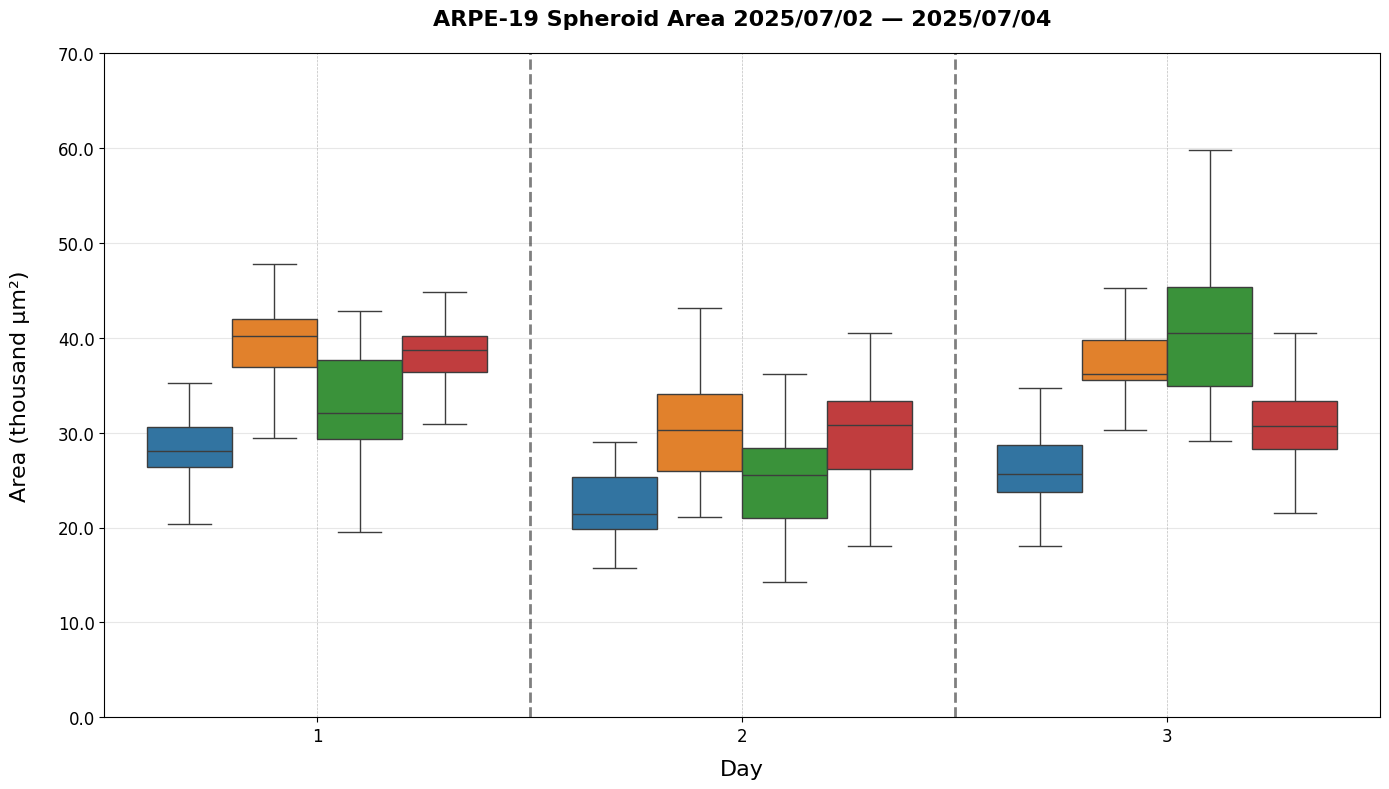

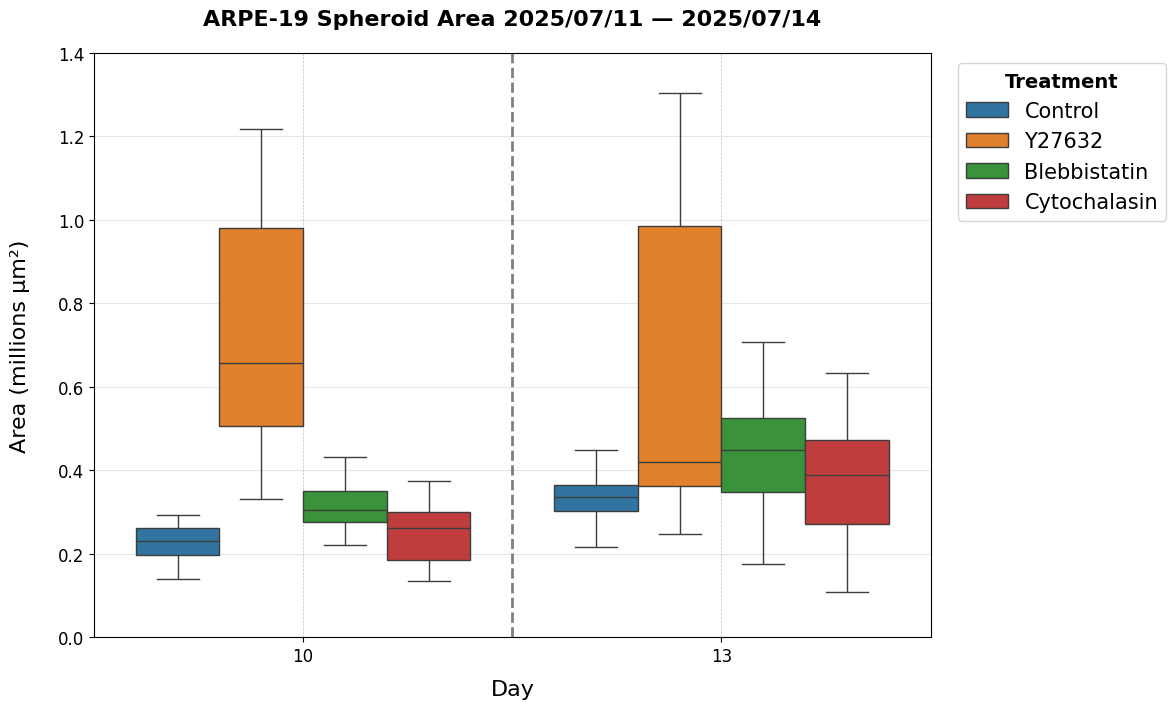

In [9]:
df_filtered_copy = df_filtered.copy()
df_filtered_copy['Day'] = (pd.to_datetime(df_filtered_copy['Date']) - pd.to_datetime(df_filtered_copy['Date']).min()).dt.days + 1

before_date = '2025-07-10'
df_before = df_filtered_copy[df_filtered_copy['Date'] < before_date].copy()
df_after = df_filtered_copy[df_filtered_copy['Date'] >= before_date].copy()

df_before_date = df_before.copy()

agents = ['Control', 'Y27632', 'Blebbistatin', 'Cytochalasin']
custom_palette = {'Control': '#1f77b4',
                  'Y27632': '#ff7f0e',
                  'Blebbistatin': '#2ca02c',
                  'Cytochalasin': '#d62728'}

# FIGURE 1: Before date (original scale)
plt.figure(figsize=(14, 8))

sns.boxplot(data=df_before_date, x='Day', y='Area, mkm^2', hue='Agent',
            hue_order=agents, palette=custom_palette, showfliers=False, legend=False)

plt.ylim(0, 70000)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e3:.1f}'))
plt.title(f'ARPE-19 Spheroid Area 2025/07/02 — 2025/07/04', fontsize=16, fontweight='bold', pad=20)

plt.xlabel('Day', fontsize=16, labelpad=10)
plt.xticks(rotation=0, fontsize=12)

plt.ylabel('Area (thousand μm²)', fontsize=16, labelpad=20)
plt.yticks(fontsize=12)

plt.grid(True, axis='y', alpha=0.3)
plt.grid(True, axis='x', alpha=0.5, linestyle='--', color='gray', linewidth=0.5)

days_before = sorted(df_before_date['Day'].unique())
for i in range(1, len(days_before)):
    plt.axvline(x=i-0.5, color='black', linestyle='--', linewidth=2, alpha=0.5)

plt.tight_layout()
plt.show()

# FIGURE 2: After date (original scale)
plt.figure(figsize=(14, 8))

sns.boxplot(data=df_after, x='Day', y='Area, mkm^2', hue='Agent',
            hue_order=agents, palette=custom_palette, showfliers=False)

plt.ylim(0, 1400000)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}'))
plt.title(f'ARPE-19 Spheroid Area 2025/07/11 — 2025/07/14', fontsize=16, fontweight='bold', pad=20)

plt.xlabel('Day', fontsize=16, labelpad=10)
plt.xticks(rotation=0, fontsize=12)

plt.ylabel('Area (millions μm²)', fontsize=16, labelpad=20)
plt.yticks(fontsize=12)
plt.legend(title='Treatment', bbox_to_anchor=(1.02, 1), loc='upper left', prop={'size': 15}, title_fontsize=14).get_title().set_fontweight('bold')

plt.grid(True, axis='y', alpha=0.3)
plt.grid(True, axis='x', alpha=0.5, linestyle='--', color='gray', linewidth=0.5)

plt.grid(True, axis='y', alpha=0.3)
plt.grid(True, axis='x', alpha=0.5, linestyle='--', color='gray', linewidth=0.5)

days_after = sorted(df_after['Day'].unique())
for i in range(1, len(days_after)):
    plt.axvline(x=i-0.5, color='black', linestyle='--', linewidth=2, alpha=0.5)

# Резервируем место справа для легенды
plt.subplots_adjust(right=0.85)

plt.tight_layout(rect=[0, 0.05, 0.85, 0.95])  # корректировка с учетом места справа
plt.show()

###Violin plot

/tmp/ipython-input-434/3242761691.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Treatment', bbox_to_anchor=(0.7, 1), prop={'size': 14}, title_fontsize=16).get_title().set_fontweight('bold')


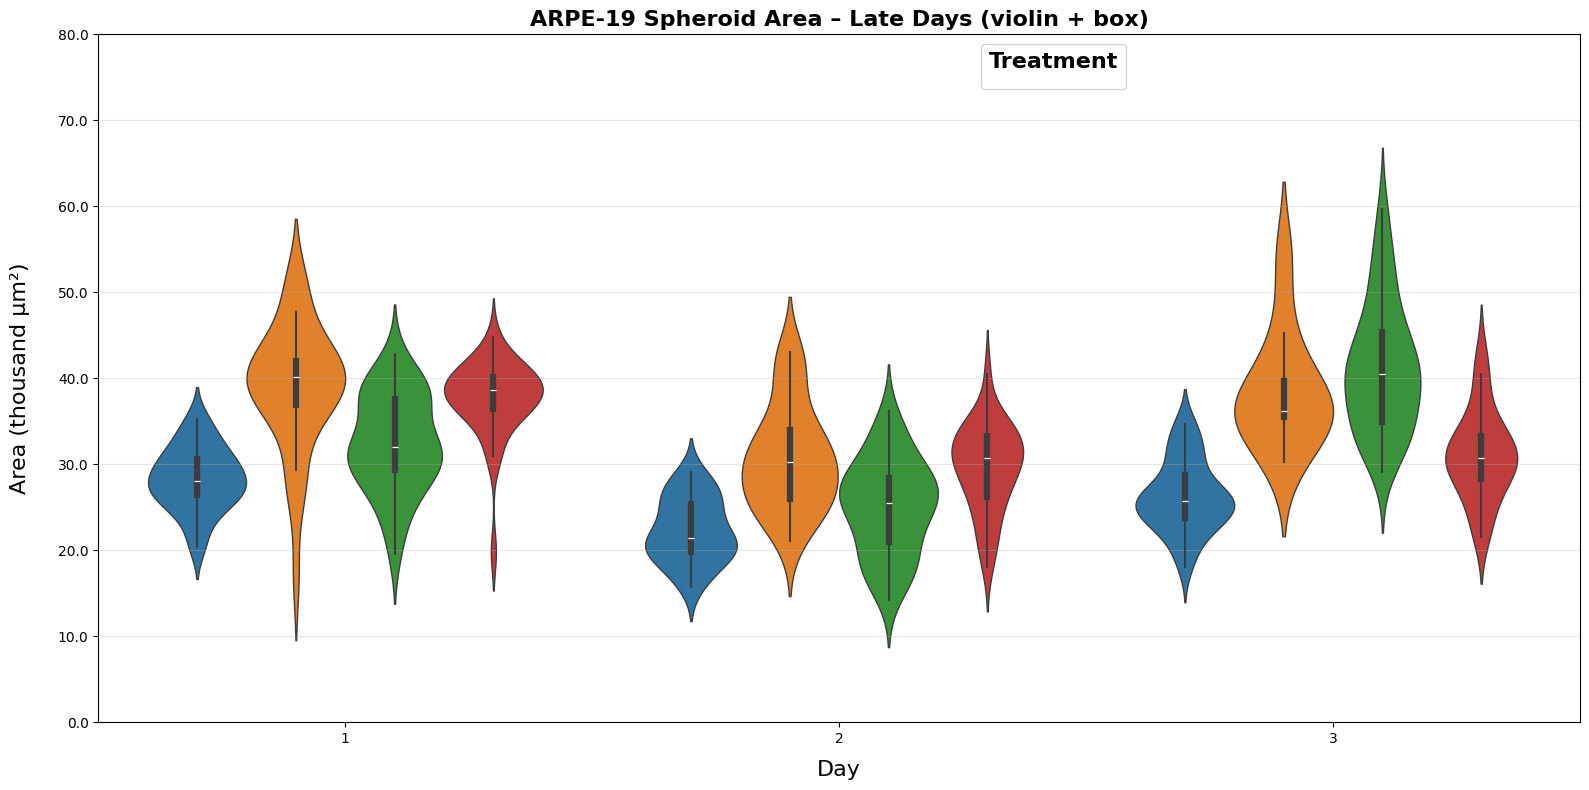

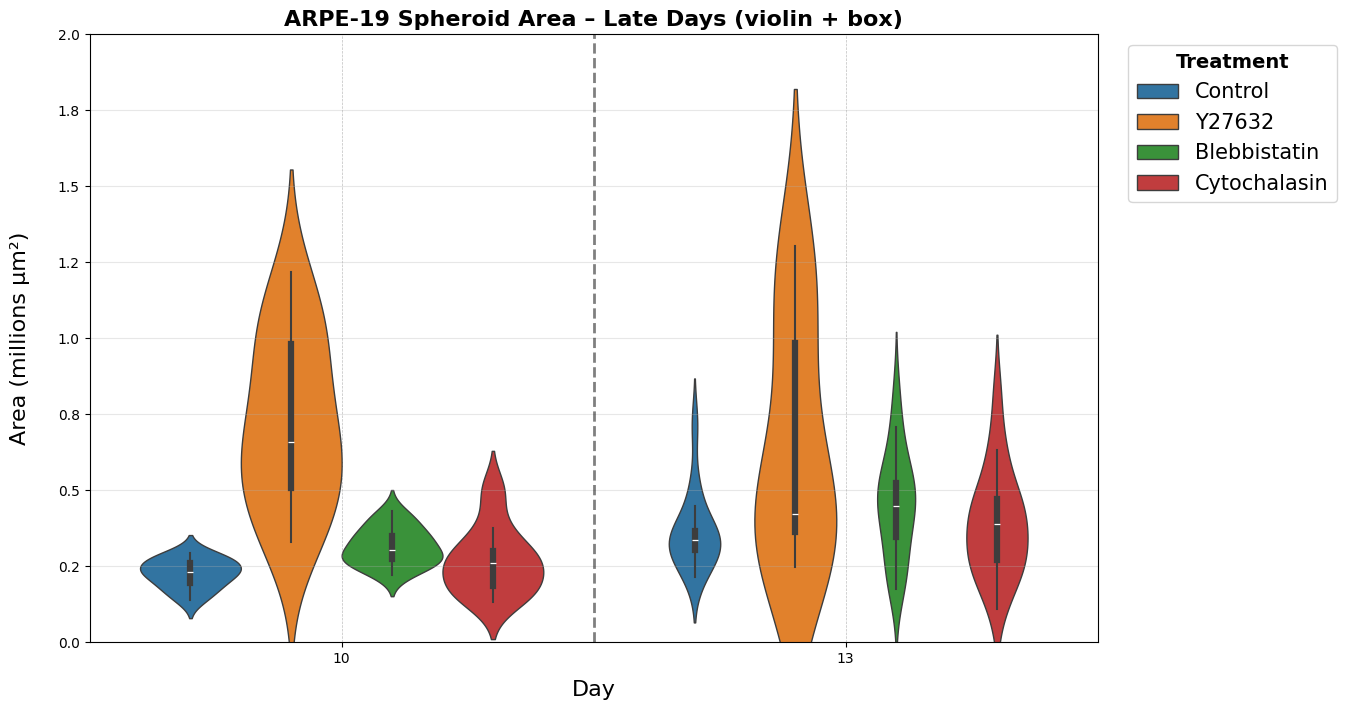

In [10]:
#FIGURE 1
plt.figure(figsize=(16, 8))
sns.violinplot(data=df_before, x='Day', y='Area, mkm^2', hue='Agent',
               hue_order=['Control', 'Y27632', 'Blebbistatin', 'Cytochalasin'],
               palette=custom_palette, split=False, linewidth=1, legend=False)
plt.ylim(0, 80e3)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e3:.1f}'))
plt.xlabel('Day', fontsize=16, labelpad=10)
plt.ylabel('Area (thousand μm²)', fontsize=16, labelpad=20)
plt.title('ARPE-19 Spheroid Area – Late Days (violin + box)', fontsize=16, fontweight='bold')
plt.legend(title='Treatment', bbox_to_anchor=(0.7, 1), prop={'size': 14}, title_fontsize=16).get_title().set_fontweight('bold')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#FIGURE 2
plt.figure(figsize=(16, 8))
sns.violinplot(data=df_after, x='Day', y='Area, mkm^2', hue='Agent',
               hue_order=['Control', 'Y27632', 'Blebbistatin', 'Cytochalasin'],
               palette=custom_palette, split=False, linewidth=1)
plt.ylim(0, 2e6)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}'))
plt.xlabel('Day', fontsize=16, labelpad=10)
plt.ylabel('Area (millions μm²)', fontsize=16, labelpad=20)
plt.title('ARPE-19 Spheroid Area – Late Days (violin + box)', fontsize=16, fontweight='bold')
plt.legend(title='Treatment', bbox_to_anchor=(1.02, 1), loc='upper left', prop={'size': 15}, title_fontsize=14).get_title().set_fontweight('bold')

plt.grid(True, axis='y', alpha=0.3)
plt.grid(True, axis='x', alpha=0.5, linestyle='--', color='gray', linewidth=0.5)

plt.grid(True, axis='y', alpha=0.3)
plt.grid(True, axis='x', alpha=0.5, linestyle='--', color='gray', linewidth=0.5)

days_after = sorted(df_after['Day'].unique())
for i in range(1, len(days_after)):
    plt.axvline(x=i-0.5, color='black', linestyle='--', linewidth=2, alpha=0.5)

# Резервируем место справа для легенды
plt.subplots_adjust(right=0.85)

plt.tight_layout(rect=[0, 0.05, 0.85, 0.95])  # корректировка с учетом места справа
plt.show()

###Facet plot

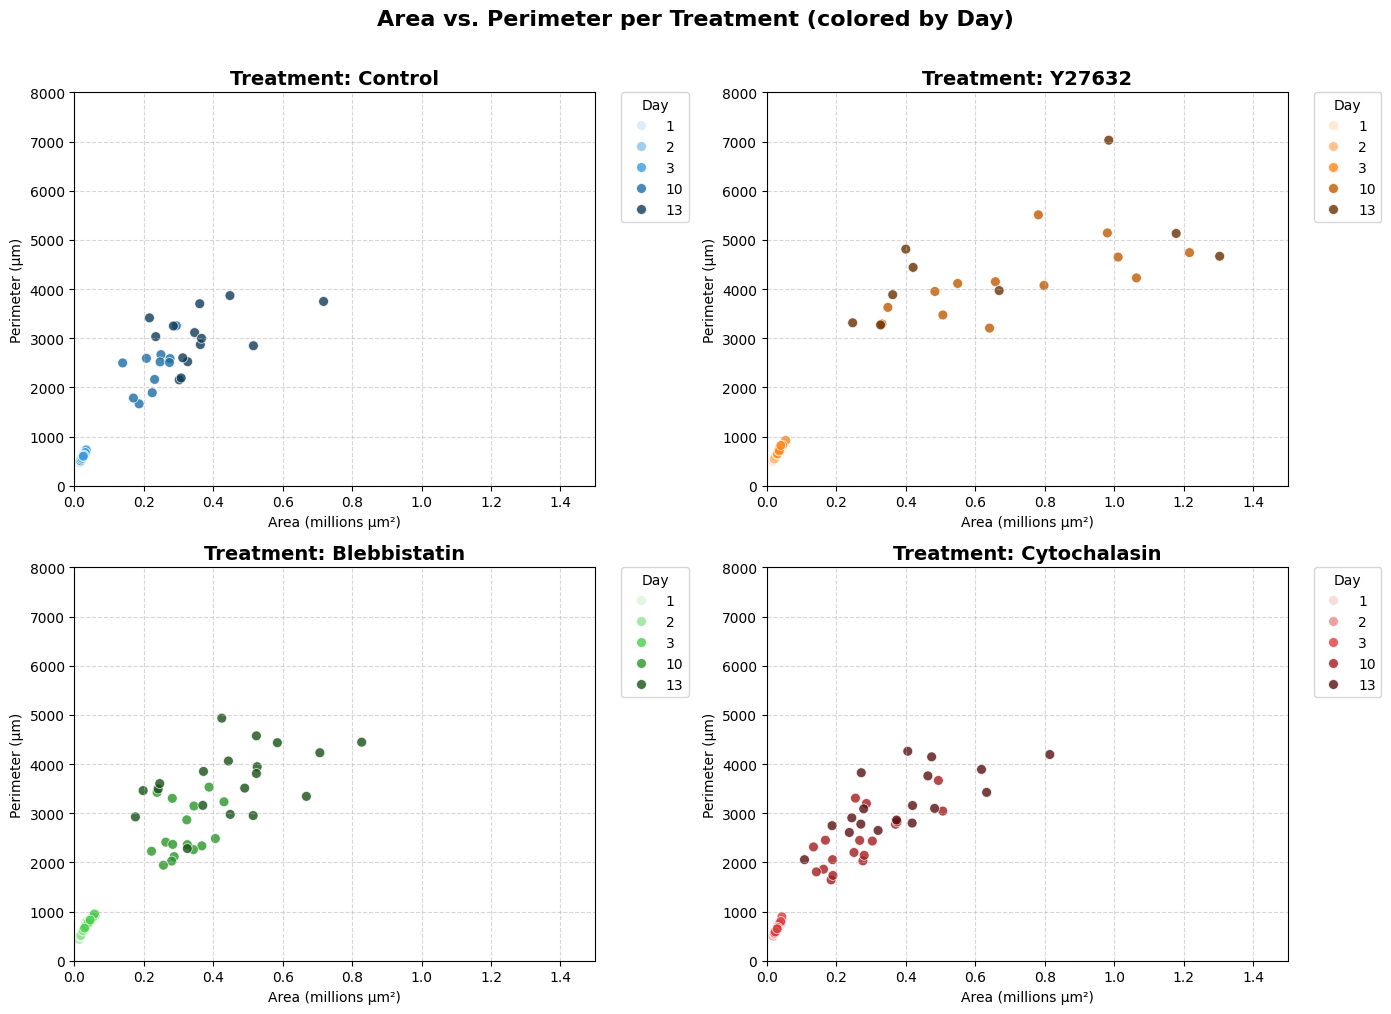

In [46]:
df_scatter = df_filtered.copy()
df_scatter['Day'] = (pd.to_datetime(df_scatter['Date']) - pd.to_datetime(df_scatter['Date']).min()).dt.days + 1

agent_colors = {
    'Control': '#1f77b4',
    'Y27632': '#ff7f0e',
    'Blebbistatin': '#2ca02c',
    'Cytochalasin': '#d62728'
}

def create_contrast_palette(base_color, n_colors):
    """
    Создает список цветов с сильными отличиями от светлого к темному.
    """
    base_rgb = to_rgb(base_color)

    if n_colors == 1:
        return [base_color]

    shades = []
    for i in range(n_colors):
        h, l, s = colorsys.rgb_to_hls(*base_rgb)
        new_l = 0.9 - 0.7 * (i / (n_colors - 1))
        r, g, b = colorsys.hls_to_rgb(h, new_l, s)
        shades.append((r, g, b))

    return shades

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

agents = list(agent_colors.keys())

for idx, agent in enumerate(agents):
    ax = axes[idx]
    subset = df_scatter[df_scatter['Agent'] == agent].copy()

    unique_days = sorted(subset['Day'].unique())
    n_days = len(unique_days)

    palette = create_contrast_palette(agent_colors[agent], n_days)

    scatter = sns.scatterplot(
        data=subset,
        x='Area, mkm^2',
        y='Perimeter, mkm',
        hue='Day',
        palette=palette,
        alpha=0.8,
        s=50,
        ax=ax,
        legend='full'
    )

    legend = ax.legend(title='Day', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

    ax.set_title(f'Treatment: {agent}', fontweight='bold', fontsize=14)
    ax.set_xlim(0, 1.5e6)
    ax.set_ylim(0, 8000)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}'))
    ax.grid(True, linestyle='--', alpha=0.5)

    ax.set_xlabel('Area (millions μm²)')
    ax.set_ylabel('Perimeter (μm)')

fig.suptitle('Area vs. Perimeter per Treatment (colored by Day)', y=1.01, fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

###Heatmap plot

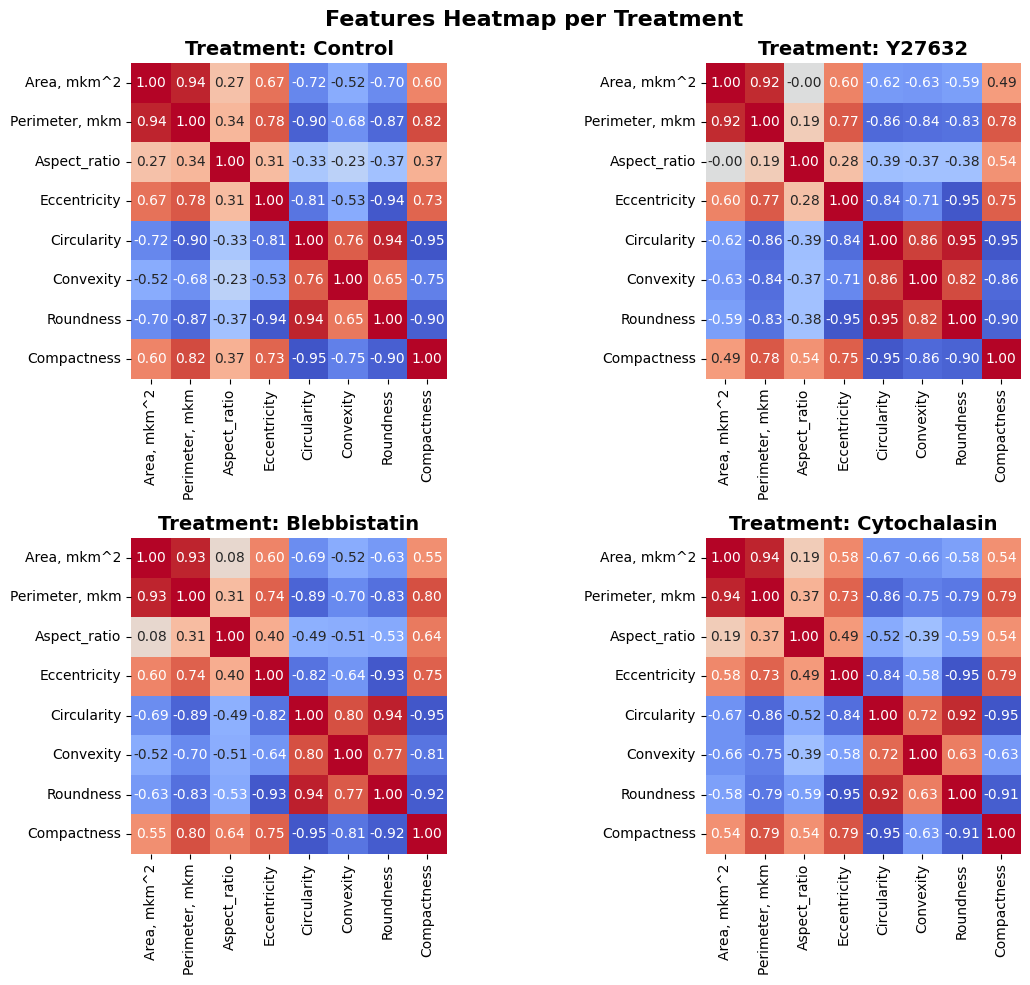

In [47]:
features = ['Area, mkm^2', 'Perimeter, mkm', 'Aspect_ratio', 'Eccentricity',
            'Circularity', 'Convexity', 'Roundness', 'Compactness']


fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes_flat = axes.flatten()

for ax, agent in zip(axes_flat, agents):
    df_agent = df_filtered[df_filtered['Agent'] == agent][features].dropna()
    corr = df_agent.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, ax=ax, cbar=False)
    ax.set_title(f'Treatment: {agent}', fontweight='bold', fontsize=14)
fig.suptitle('Features Heatmap per Treatment', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()